# Ismael Domínguez Olalde
# *Analisis sobre las 5 mejores empresas que cotizan en la Bolsa Mexicana de Valores.*

## Econometría financiera

In [3]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline
plt.style.use('ggplot')

Según el 'Economista' ("https://www.eleconomista.com.mx/mercados/Cinco-empresas-dominan-en-la-Bolsa-Mexicana-de-Valores-20210818-0147.html") Las 5 compañías más grandes en cuanto a su cotización en el Grupo Bolsa Mexicana (BMV) de Valores a finales del 2021 son:
* América Móvil
* Walmart
* Femsa
* Banorte
* Grupo México

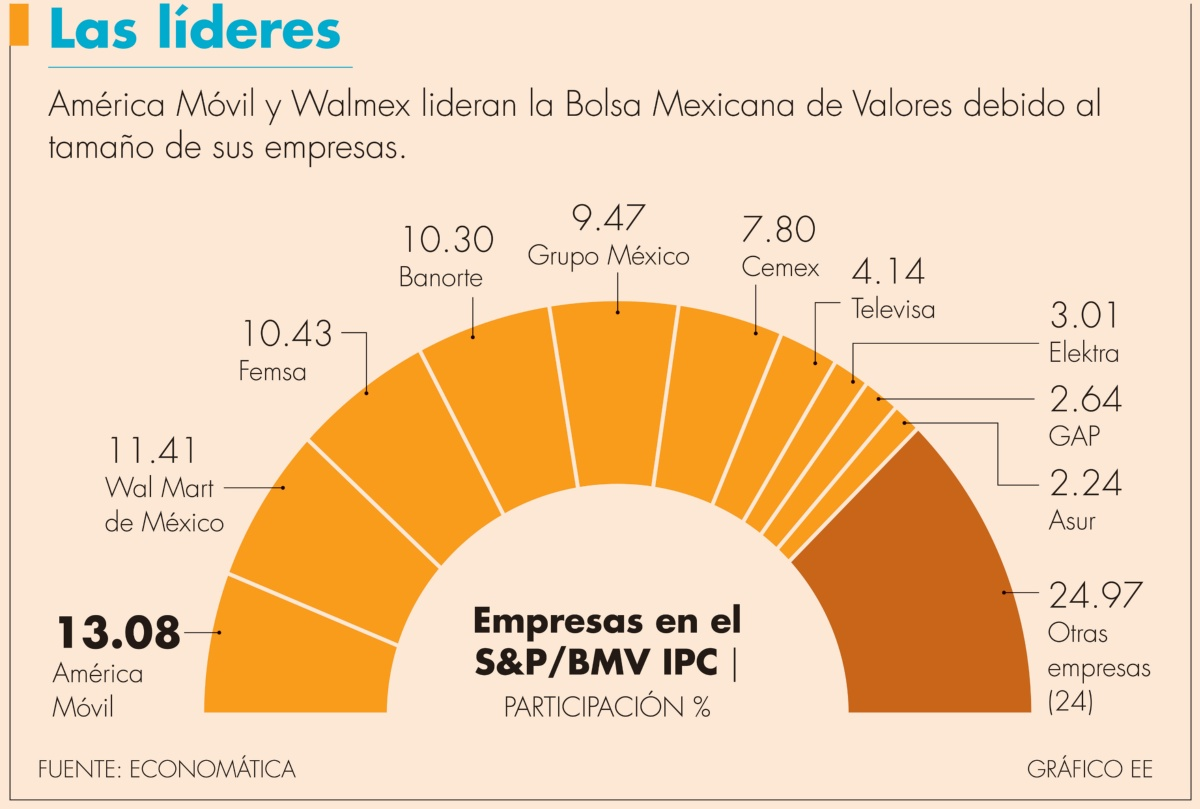

In [4]:
Top5 = [ 'WALMEX.MX', 'KOFUBL.MX', 'GFNORTEO.MX', 'GMEXICOB.MX', 'CEMEXCPO.MX' ]
Top5

['WALMEX.MX', 'KOFUBL.MX', 'GFNORTEO.MX', 'GMEXICOB.MX', 'CEMEXCPO.MX']

In [5]:
# Creamos un pandas con los valores de cierre de las 5 empresas que tienen mayor participación en el Grupo BMV, durante el último año.
data = pd.DataFrame()
data = yf.download(Top5, start='2021-08-13', end='2022-08-13')['Adj Close']
data

[*********************100%%**********************]  5 of 5 completed


Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Date,,,,,
2021-08-13,16.10,107.839798,80.216873,106.441917,68.148872
2021-08-16,16.00,107.231972,79.261925,106.742790,67.838356
2021-08-17,15.81,109.170448,77.928421,106.533089,68.216797
2021-08-18,15.88,107.593391,78.263939,106.277809,71.127899
2021-08-19,15.54,103.979286,74.340858,104.901123,69.449158
...,...,...,...,...,...
2022-08-08,9.01,101.185928,71.850006,116.085701,69.611572
2022-08-09,8.75,101.844177,69.900116,116.727440,69.738953
2022-08-10,8.99,105.977982,73.966225,115.664268,70.062325


In [6]:
# Con ".dropna" eliminamos los datos nulos o iguales a 0; ya que, si estos existen, entonces van a perjudicar al análisis efectuado.
data= data.dropna()
data

Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Date,,,,,
2021-08-13,16.10,107.839798,80.216873,106.441917,68.148872
2021-08-16,16.00,107.231972,79.261925,106.742790,67.838356
2021-08-17,15.81,109.170448,77.928421,106.533089,68.216797
2021-08-18,15.88,107.593391,78.263939,106.277809,71.127899
2021-08-19,15.54,103.979286,74.340858,104.901123,69.449158
...,...,...,...,...,...
2022-08-08,9.01,101.185928,71.850006,116.085701,69.611572
2022-08-09,8.75,101.844177,69.900116,116.727440,69.738953
2022-08-10,8.99,105.977982,73.966225,115.664268,70.062325


In [7]:
# Convertimos los valores de la tabla anterior, en una representación de lo que su valor de la fila columna representa con respecto a otro valor. En este caso con ".iloc[0]" (esta parte del código determina una posición fila columna especifica) que representa la primer fila (0)
(data / data.iloc[0])

Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Date,,,,,
2021-08-13,1.000000,1.000000,1.000000,1.000000,1.000000
2021-08-16,0.993789,0.994364,0.988095,1.002827,0.995444
2021-08-17,0.981988,1.012339,0.971472,1.000857,1.000997
2021-08-18,0.986335,0.997715,0.975654,0.998458,1.043714
2021-08-19,0.965217,0.964201,0.926748,0.985525,1.019080
...,...,...,...,...,...
2022-08-08,0.559627,0.938299,0.895697,1.090601,1.021463
2022-08-09,0.543478,0.944403,0.871389,1.096630,1.023332
2022-08-10,0.558385,0.982735,0.922078,1.086642,1.028078


<Axes: xlabel='Date'>

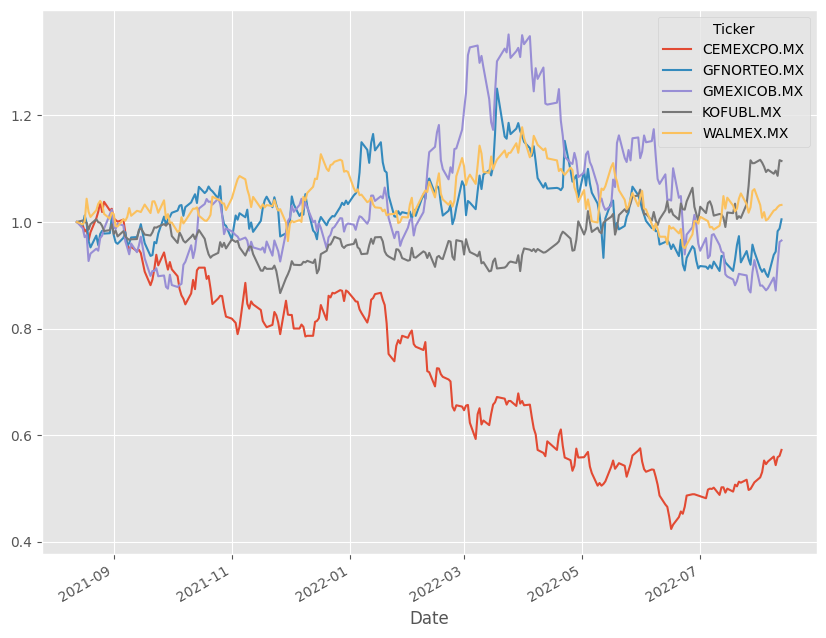

In [8]:
# Graficamos la tabla anterior.
(data / data.iloc[0]).plot(figsize=(10, 8))

In [9]:
# Sacamos rendimientos, rendimientos logarítmicos, lo cual va servimos en nuestro análisis porque va a disminuir la volatilidad de los activos durante el tiempo.
# ".shift(1)" sirve para mover la formula en los periodos que se busquen en este caso es uno, es decir, por día.
rendimientos = np.log(data / data.shift(1))

In [10]:
# Visualizamos la tabla y eliminamos los datos nulos
rendimientos = rendimientos.dropna()
rendimientos

Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Date,,,,,
2021-08-16,-0.006231,-0.005652,-0.011976,0.002823,-0.004567
2021-08-17,-0.011946,0.017916,-0.016967,-0.001966,0.005563
2021-08-18,0.004418,-0.014551,0.004296,-0.002399,0.041789
2021-08-19,-0.021643,-0.034168,-0.051426,-0.013038,-0.023885
2021-08-20,0.015959,-0.012400,0.014932,0.010461,-0.009405
...,...,...,...,...,...
2022-08-08,0.016788,0.045154,0.022634,-0.006907,0.015748
2022-08-09,-0.029281,0.006484,-0.027513,0.005513,0.001828
2022-08-10,0.027059,0.039787,0.056541,-0.009150,0.004626


In [11]:
# Sacamos los rendimientos por acción durante este periodo con ".mean" que es el promedio de los rendimientos y los anualizamos al multiplicarlo por 252
rendimientos.mean() * 252

Ticker
CEMEXCPO.MX   -0.556322
GFNORTEO.MX    0.005003
GMEXICOB.MX   -0.035198
KOFUBL.MX      0.108011
WALMEX.MX      0.031474
dtype: float64

Ahora sacamos la matris de covarianza con el codigo ".cov" el cual efectua la siguiente operación:

$$C_{xy}=\rho _{xy}\sigma _{x}\sigma _{y}$$

*   $C_{xy}$:  Covarianza del par de activos
*  $\rho _{xy}$:  Coeficientes de correlación
*   $\sigma _{x}\sigma _{y}$: Desviación estándar de cad

In [12]:
rendimientos.cov() *252

Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Ticker,,,,,
CEMEXCPO.MX,0.160488,0.036955,0.044080,0.029273,0.017419
GFNORTEO.MX,0.036955,0.134748,0.049481,0.011892,0.022885
GMEXICOB.MX,0.044080,0.049481,0.150623,0.006727,0.012790
KOFUBL.MX,0.029273,0.011892,0.006727,0.051817,0.006171
WALMEX.MX,0.017419,0.022885,0.012790,0.006171,0.067882


La anterior matriz nos sirve para medir la rentabilidad que va tener uno de los activos del portafolio, en relación a la rentabilidad esperada de otro activo del portafolio.

**¿Como se interpreta la covarianza entre dos variables (activos)?**

* Si es < 0 quiere decir que los activos tienen una relación negativa, lo que quiere decir que en la medida que represente el valor de la **cov** el movimiento de la variable será inversa para la otra, es decir, si un activo sube, el otro va a disminuir.
* Si es > 0 quiere decir que existe una relación positiva entre las variables, lo que significa que, si una sube o baja, la otra va a seguir el mismo camino en el impacto que refleje la **cov**
* Si es = 0 entonces, no existe relación alguna entre las variables. Lo que quiere decir que mientras más cercano el valor de la **cov** a 0, entonces menor impacto existe entre las variables.

**Análisis de la Matriz de Covarianza**

Como podemos ver los valores de toda la matriz son positivos, lo que quiere decir que todos los activos entre ellos se relacionan positivamente entre sí, lo que quiere decir que en su mayoría (y a diferente medida) si un activo sube los demás lo van a hacer. Ahora bien, es cierto que los valores son un tanto cercanos a 0, pero es preciso visualizar la diagonal principal de la matriz la cual representa la relación entre las mismas variables, (activos) al comparar estos valores con los demás podemos ver que el valor es significativo, lo cual reafirma que las variables del portafolio, tienen una relación directa (positiva).

Ahora sacamos la matriz de correlación para ver la relación lineal que existen entre los activos, para ello se utiliza el código ".corr", el cual efectúa la siguiente formula:

$$\rho_{xy}=\frac{Cov_{xy}}{\sigma _{x}\sigma _{y}}=\frac{\sum \left ( x_i-\bar{x}\right )\left (y_i-\bar{y}  \right ) }{\sqrt{\sum \left ( x_i-\bar{x}\right )^{2}\left ( y_i-\bar{y}\right )^{2}}}$$

*   $\rho _{xy}$:  Coeficientes de correlación
*   $C_{xy}$:  Covarianza del par de activos $(x,y)$
*   $\sigma _{x}\sigma _{y}$: Desviación estándar de cada activo

In [13]:
rendimientos.corr()

Ticker,CEMEXCPO.MX,GFNORTEO.MX,GMEXICOB.MX,KOFUBL.MX,WALMEX.MX
Ticker,,,,,
CEMEXCPO.MX,1.000000,0.251299,0.283515,0.321001,0.166890
GFNORTEO.MX,0.251299,1.000000,0.347325,0.142312,0.239283
GMEXICOB.MX,0.283515,0.347325,1.000000,0.076142,0.126485
KOFUBL.MX,0.321001,0.142312,0.076142,1.000000,0.104055
WALMEX.MX,0.166890,0.239283,0.126485,0.104055,1.000000


Con la matriz de *Correlación* reafirmamos lo que describimos en la matriz de *cov*, además de visualizar de mejor manera su dirección de este impacto entre activos.

Ahora lo que buscaremos serán los rendimientos esperados del Portafolio el cual sigue la siguiente formula:

$$\mu =\mathbb{E}\left ( \sum_{I}w_ir_i \right ) \\
\mu=\sum_{I}w_i\mathbb{E}\left (r_i \right )
\\
\mu=\sum_{I}w_i\mu_i
\\
\mu=w^{T}\mu$$

*   $\mu_{p}$: Rendimiento del portafolio
*   $w _{i}$: Son los pesos individuales de cada activo
*   $r_{i}$: Son los rendimientos de cada activo (vector con valores devueltos que se supone que se distribuyen normalmente)
*   $w^{T}$: Matriz traspuesta de los pesos $w _{i}$
*   $\mu_{i}$: Rendimiento esperado del i-ésimo activo
*   $\mu$: Es el vector de los rendimientos esperados de los valores

Para realizar esta fórmula, primero debemos obtener los pesos individuales, los que representa el porcentaje dentro del portafolio de cada activo escogido.
Para ello primero lo haremos de manera aleatoria, para después poder comparar los diferentes métodos que existen para escoger estos porcentajes.

In [14]:
# Para generar los valores aleatorios, (los cuales no deben ser mayores a 1) primero debemos crear una variable que represente la cantidad de valores que queremos obtener, para ello utilizamos ".len" el cual cuenta las variables con las que cuenta, en este caso la variable "Top5".
numero_de_tickers = len(Top5)
numero_de_tickers

5

In [15]:
Aleatorios = np.random.random(numero_de_tickers)
# El "/" lo que hace es dividir entre cada uno de los activos un valor aleatorio y que dicha suma sea igual a 1
Aleatorios /= np.sum(Aleatorios)
Aleatorios

array([0.18704873, 0.24425272, 0.2110171 , 0.28327076, 0.07441069])

In [16]:
# Corroboramos que esta suma no sea = 1
np.sum(Aleatorios)

1.0

Obtenemos el rendimiento anualizado de este portafolio con los pesos (porcentajes del capital para cada activo) aleatorios.

In [17]:
# Multiplicamos los rendimientos obtenidos antes de cada activo por el peso aleatorio para saber el rendimiento del portafolio hecho con pesos aleatorios, además de anualizarlo por un año bursátil.
np.sum(rendimientos.mean() * Aleatorios) * 252

-0.07732660549044466

Como podemos ver al efectuar un portafolio de manera arbitraria, obtenemos un portafolio con rendimientos negativos anual, esto no quiere decir que siempre suceda esto, pero al no tener un sustento técnico a la hora de armar un portafolio, es más probable obtener estos rendimientos negativos.

**¿Como podemos mejorar este rendimiento con esta técnica de portafolios con pesos arbitrarios?**

A través de la *Simulación Montecarlo* podemos desarrollar varios portafolios de manera arbitraria y así efectuar la mejor combinación, para ello se debe hacer la mayor cantidad posible de simulación, para poder obtener el mejor portafolio posible, pero esto significa tener mayores recursos informáticos.

In [18]:
# Generamos "n" simulaciones Montecarlo.
portafolio_rendimientos = []
portafolio_riesgo = []
# Creamos una lista vacía para saber qué pesos fueron creados.
portafolio_de_pesos = []
for p in range (3000):
    Aleatorios = np.random.random(numero_de_tickers)
    Aleatorios /= np.sum(Aleatorios)
    portafolio_de_pesos.append(Aleatorios)
    portafolio_rendimientos.append(np.sum(rendimientos.mean() * Aleatorios) * 252)
    portafolio_riesgo.append(np.sqrt(np.dot(Aleatorios.T,
        np.dot(rendimientos.cov() * 252, Aleatorios))))

lista_de_pesos = pd.DataFrame(portafolio_de_pesos)
lista_rendimientos = pd.DataFrame(portafolio_rendimientos)
lista_riesgo = pd.DataFrame(portafolio_riesgo)
portafolio_de_pesos = np.array(portafolio_de_pesos)
portafolio_rendimientos = np.array(portafolio_rendimientos)
portafolio_riesgo = np.array(portafolio_riesgo)

In [19]:
# Vemos los rendimientos
lista_rendimientos

,0
0,-0.102787
1,-0.135964
2,-0.042616
3,-0.113734
4,-0.124604
...,...
2995,-0.010030
2996,-0.108220
2997,-0.059045
2998,-0.102963


In [20]:
# Ahora con los Riesgos.
lista_riesgo

,0
0,0.254224
1,0.251194
2,0.255519
3,0.218810
4,0.209287
...,...
2995,0.213137
2996,0.214775
2997,0.187708
2998,0.222162


In [21]:
# Juntamos en una tabla los rendimientos y los riesgos obtenidos en una tabla que llamaremos RR.
RR = ['Rendimiento', 'Riesgo']
rend_riesgo=pd.concat([lista_rendimientos,lista_riesgo], axis=1)
rend_riesgo.columns= RR
rend_riesgo

,Rendimiento,Riesgo
0,-0.102787,0.254224
1,-0.135964,0.251194
2,-0.042616,0.255519
3,-0.113734,0.218810
4,-0.124604,0.209287
...,...,...
2995,-0.010030,0.213137
2996,-0.108220,0.214775
2997,-0.059045,0.187708
2998,-0.102963,0.222162


Ya que sabemos los rendimientos organizamos para saber cual fue el mayor.

In [24]:
rend_riesgo.sort_values(by="Rendimiento", inplace=True, ascending=False)
rend_riesgo

,Rendimiento,Riesgo
524,0.060763,0.173977
264,0.058321,0.181840
975,0.049937,0.179614
2776,0.048456,0.173772
1518,0.048225,0.173500
...,...,...
1548,-0.368524,0.307822
2834,-0.389647,0.313929
880,-0.410214,0.325184
942,-0.478321,0.358572


Vemos que la simulación 1705 es la que obtuvo el mayor rendimiento de las 3000 simulaciones, con un rendimiento de 0.0738 es decir 7.38% con un riesgo de 17.67%. Lo que sigue es localizar el peso del portafolio, el cual es el siguiente:

In [25]:
lista_de_pesos.rename(columns={"0": "CEMEXCPO.MX", "1": "GFNORTEO.MX", "2": "GMEXICOB.MX", "3": "KOFUBL.MX", "4": "WALMEX.MX"}, inplace=False)
lista_de_pesos.iloc[524]

0    0.018796
1    0.019874
2    0.042545
3    0.570971
4    0.347813
Name: 524, dtype: float64

Seguimos con el ratio **Sharpe** el cual tine la siguiente forma:

$$SR= \frac{\mu_{p}-r_{f}}{\sigma_{p}}$$

* $\mu_{p} =$ Rendimiento del portafolio
* $r_{f} =$ Tasa libre de riesgo
* $\sigma_{p} =$ Desviación estandar, es decir el riesgo

Primero hay que sacar la tasa libre de riesgo, en este caso vamos a ocupar la tasa libre de riesgo diaria de los bonos del tesoro de Estados Unidos a 10 años

In [26]:
import datetime
from pandas.tseries.offsets import BDay

today = datetime.datetime.today()
previous_business_date = today - BDay(1)
previous_business_date

rf = yf.download('^TNX', start='2021-08-13', end='2022-08-13')['Adj Close']
rf = rf / 100
rf

[*********************100%%**********************]  1 of 1 completed


Date
2021-08-13    0.01297
2021-08-16    0.01257
2021-08-17    0.01258
2021-08-18    0.01273
2021-08-19    0.01242
               ...   
2022-08-08    0.02765
2022-08-09    0.02797
2022-08-10    0.02786
2022-08-11    0.02888
2022-08-12    0.02849
Name: Adj Close, Length: 252, dtype: float64

In [27]:
numerador_sharpe = portafolio_rendimientos - rf[0]

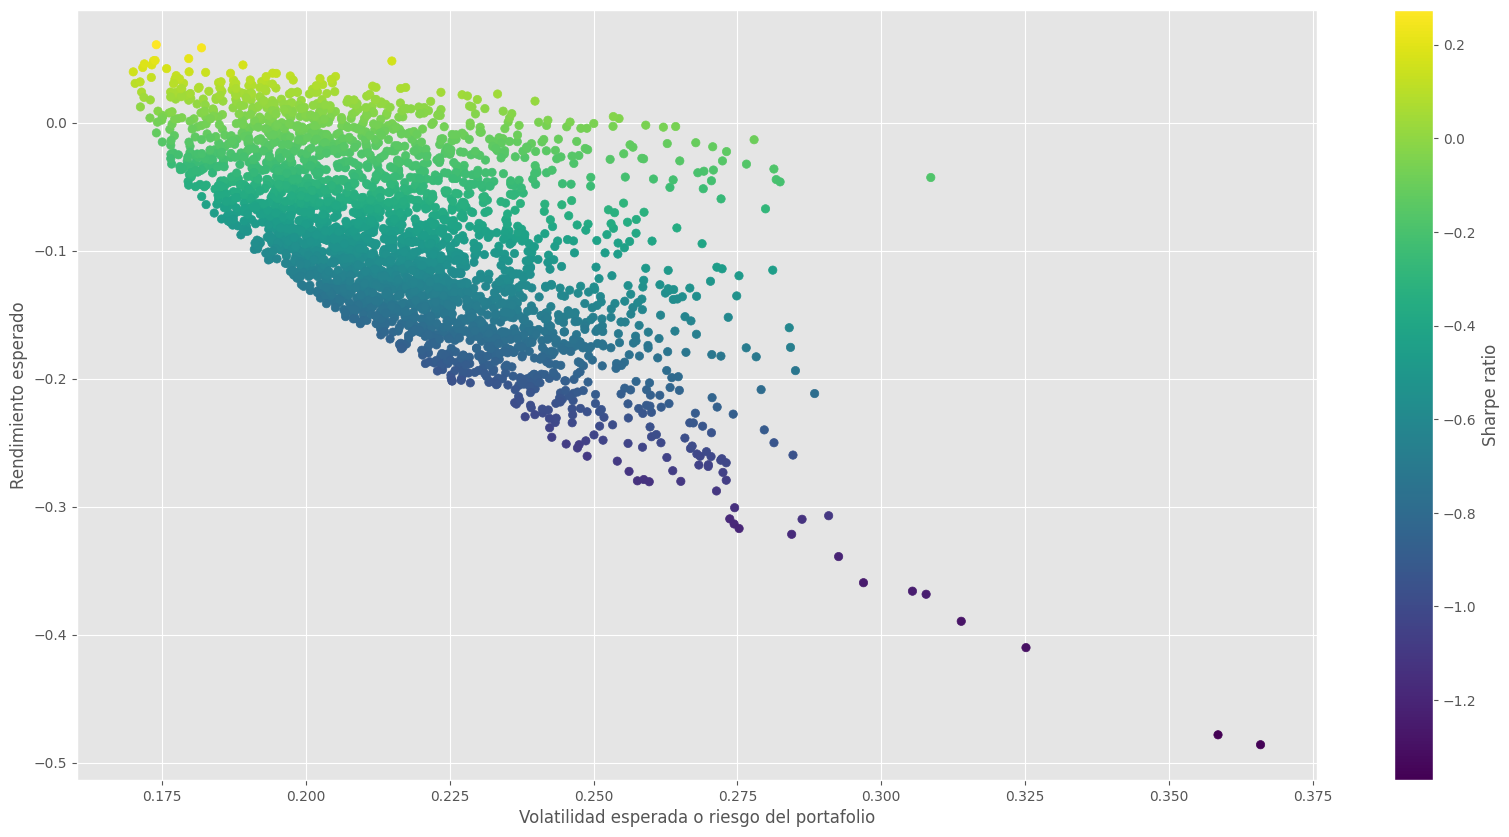

In [28]:
# Gráficamos el indice de Sharpe.
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo,
            portafolio_rendimientos,
            c=numerador_sharpe/ portafolio_riesgo,
            marker='o')
plt.grid(True)
plt.xlabel('Volatilidad esperada o riesgo del portafolio')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')

Como se espera que el rendimiento sea lo más alto posible y el riesgo lo más bajo posible. entonces se busca que el índice sharpe sea lo más alto posible.

In [29]:
Sharpie = numerador_sharpe/ portafolio_riesgo
Sharpie = pd.DataFrame(Sharpie)
Sharpie

,0
0,-0.455335
1,-0.592906
2,-0.217543
3,-0.579059
4,-0.657344
...,...
2995,-0.107910
2996,-0.564266
2997,-0.383656
2998,-0.521840


In [30]:
# Ya que generamos la tabla de todos los coeficientes de Sharpie, entonces buscamos el que tenga un índice mayor; ya que esto refleja mayor rendimiento y menor riesgo de ese portafolio.
Sharpie.sort_values(by=[0], inplace=True, ascending=False)
Sharpie

,0
524,0.274709
264,0.249402
975,0.205816
2776,0.204209
1518,0.203197
...,...
1142,-1.254461
2834,-1.282511
880,-1.301366
2707,-1.363634


Podemos ver que el mejor portafolio según el índice de Sharpie no es el portafolio que tiene el mejor rendimiento de las 3000 simulaciones, a la hora de comparar dicho rendimiento con su riesgo, podemos ver que el mejor portafolio es el segundo con mejor rendimiento de las 3000 simulaciones.

In [31]:
# Vemos cuales osn los pesos de este portafolio.
lista_de_pesos.iloc[524]

0    0.018796
1    0.019874
2    0.042545
3    0.570971
4    0.347813
Name: 524, dtype: float64

Ahora bien, es cierto que el portafolio que se escogió es el mejor portafolio de las 3000 simulaciones efectuadas, considerando las 5 acciones tomadas desde el principio, pero como podemos ver en la gráfica, donde salen la volatilidad de los activos, vemos varios activos, (principalmente Cemex) que tienen tendencia negativa y además representan un gran riesgo para el portafolio para ello debemos sacra el:

**Portafolio óptimo de Sharpie** ... es decir con las mismas 3000 simulaciones

In [47]:
# Para ello primero optimizamos los portafolios.
# Agregamos los elemntos en una función.
def statistics(pesos):
  pesos = np.array(pesos)
  portafolio_rendimientos = np.sum(rendimientos.mean() * pesos) * 252
  portafolio_riesgo = np.sqrt(np.dot(pesos.T, np.dot(rendimientos.cov() * 252, pesos)))
  return np.array([portafolio_rendimientos, portafolio_riesgo, portafolio_rendimientos / portafolio_riesgo])

Obtenemos el mínimo de la función.

In [33]:
def min_sharpe(pesos):
  return -statistics(pesos)[2]

In [34]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [37]:
bnds = tuple((0, 1) for x in range(numero_de_tickers))

Parámetro Inicial para los pesos.

In [35]:
numero_de_tickers * [1. / numero_de_tickers,]

[0.2, 0.2, 0.2, 0.2, 0.2]

Ahora guardamos los parámetros de la optimización en una variable llamada *opts*.

In [38]:
%%time
opts = sco.minimize(min_sharpe, numero_de_tickers * [1. / numero_de_tickers,], method='SLSQP',
bounds=bnds, constraints=cons)
opts

CPU times: user 109 ms, sys: 6.64 ms, total: 116 ms
Wall time: 219 ms


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.47989627828743636
       x: [ 0.000e+00  2.229e-13  0.000e+00  8.814e-01  1.186e-01]
     nit: 7
     jac: [ 3.013e+00  1.247e-01  2.548e-01  4.944e-05 -3.675e-04]
    nfev: 42
    njev: 7

Con esto podemos obtener su rendimiento, riesgo e índice de sharpie, respectivamente.

In [39]:
statistics(opts['x']).round(4)

array([0.0989, 0.2062, 0.4799])

... Con los siguientes parametros (Pesos)

In [40]:
opts['x'].round(4)

array([0.    , 0.    , 0.    , 0.8814, 0.1186])

Como podemos ver, aunque obviamente el portafolio que obtuvimos es el mayor de todos los obtenidos hasta ahora, sigue teniendo un índice de Sharpie bajo, aun así, la relación rendimiento beneficio es mejor a la hora de discriminar las últimas tres variables escogidas y solo quedándonos con las dos principales acciones de Grupo BMV, es decir, Walmex y Femsa.
Claro está, que este portafolio depende a la tolerancia ante el riesgo que tenga la persona a invertir en estos activos, ya que se puede tener una rentabilidad menor, a un riesgo igualmente mejor.

Ahora podemos obtener otros portafolios óptimos con la  **Mínima Var**.

In [41]:
def min_varianza(pesos):
  return statistics(pesos)[1] ** 2

In [42]:
optv = sco.minimize(min_varianza, numero_de_tickers * [1. / numero_de_tickers,],
method='SLSQP', bounds=bnds,
constraints=cons)
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.028582342088386652
       x: [ 8.505e-03  6.940e-02  1.156e-01  4.763e-01  3.302e-01]
     nit: 11
     jac: [ 5.744e-02  5.721e-02  5.729e-02  5.714e-02  5.713e-02]
    nfev: 66
    njev: 11

In [43]:
statistics(optv['x']).round(4)

array([0.0534, 0.1691, 0.3158])

In [44]:
# Pesos
optv['x'].round(4)

array([0.0085, 0.0694, 0.1156, 0.4763, 0.3302])

**Frontera Eficiente**

Esta *frontera eficiente* al igual que al graficar los puntos (portafolios) del índice de Sharpie para ver cuál era el más eficiente en cuanto su relación rendimiento/riesgo, pues ahora se pueden visualizar según a los portafolios de menor varianza, es decir, menor volatilidad, lo que quiere decir, menor riesgo.

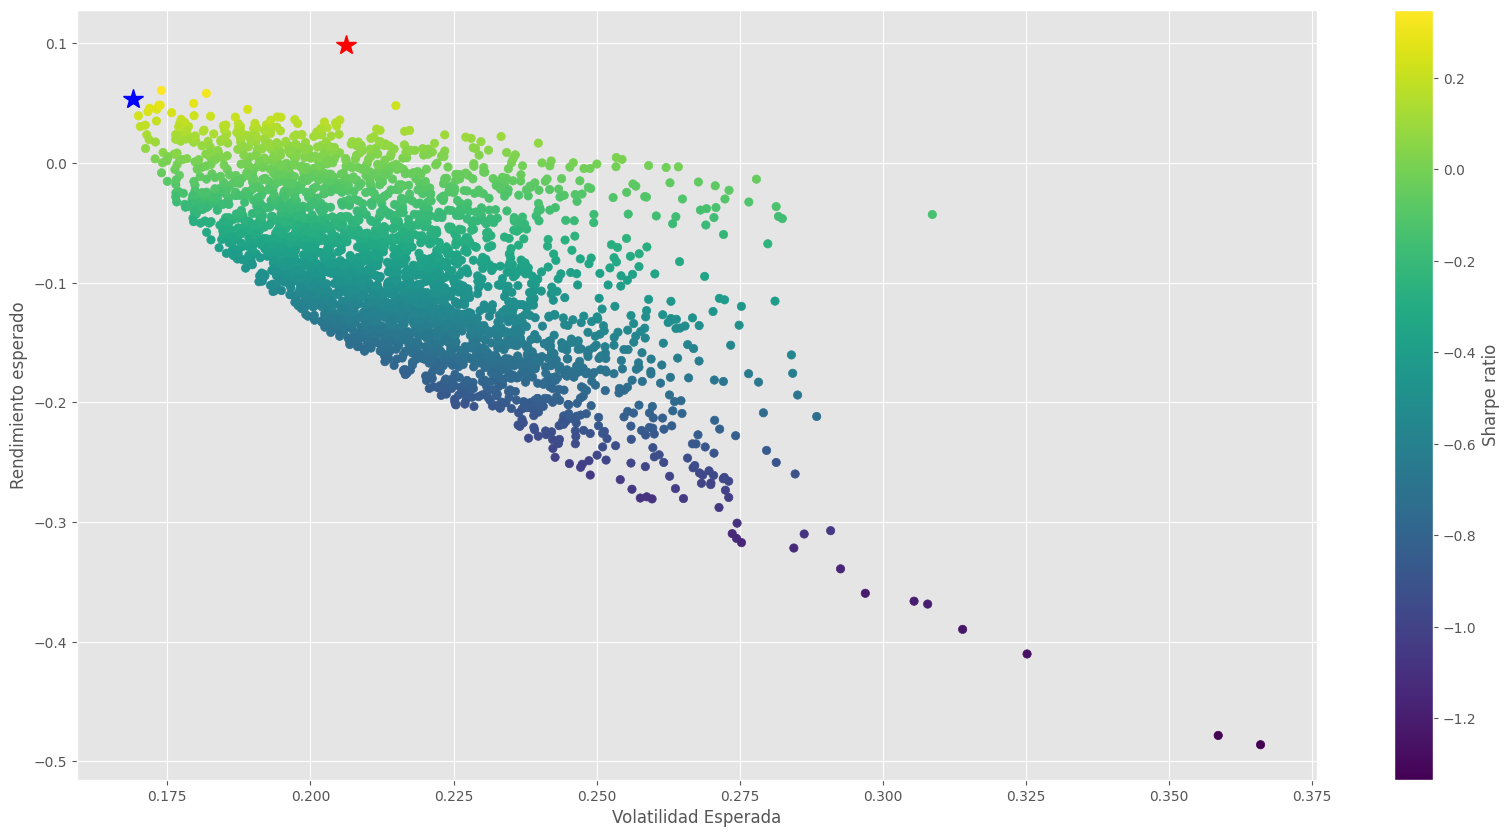

In [55]:
plt.figure(figsize=(20, 10))
plt.scatter(portafolio_riesgo,
            portafolio_rendimientos,
            c=portafolio_rendimientos/ portafolio_riesgo,
            marker='o')
# Mejor portafolio de Sharpe
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
'r*', markersize=15.0)
# Portafolio de mínima varianza
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
'b*', markersize=15.0)
plt.grid(True)
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento esperado')
plt.colorbar(label='Sharpe ratio')